# **P2 - Algoritmos avançados**
---

### Instruções de uso:
Execute o primeiro bloco para fazer a instação das bibliotecas necessárias.\
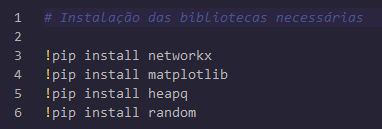

Execute o segundo bloco para dar início ao algoritmo.\
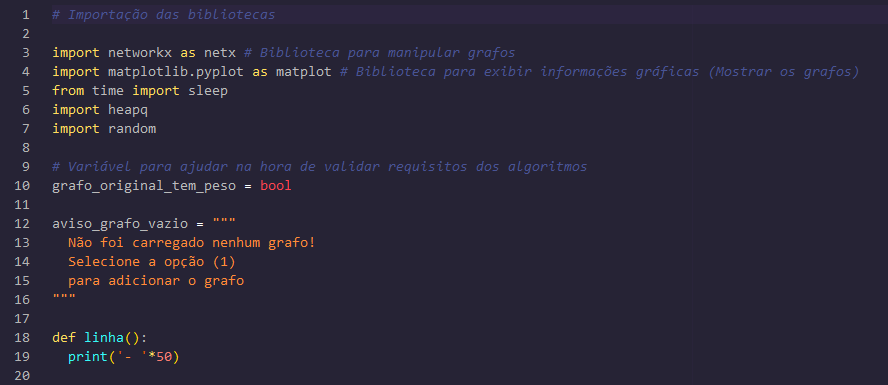

Selecione primeiramente a função (1) para dar início ao grafo.\
Acompanhe as mensagens retornadas no console para avançar ao próximo passo.\
Lembre-se, ao 'Concluir' o grafo, irá demorar 5 segundos para o menu retornar.


---

**Grupo:**
* Felipe Ferreira
* José Augusto
* Mariana Galvão
* Matheus Morandi
* Victor Kashima
* Vinicius Mendonça

In [ ]:
# Instalação das bibliotecas necessárias

!pip install networkx
!pip install matplotlib
!pip install numpy

In [ ]:
# Importação das bibliotecas

import networkx as netx # Biblioteca para manipular grafos
import matplotlib.pyplot as matplot # Biblioteca para exibir informações gráficas (Mostrar os grafos)
from time import sleep
from numpy import random



# Variável para ajudar na hora de validar requisitos dos algoritmos
grafo_original_tem_peso = bool

aviso_grafo_vazio = """
  Não foi carregado nenhum grafo!
  Reinicie o programa e adicione
  um grafo!
"""

def linha():
  print('- '*50)

# Função para definir se o grafo terá ou não direção
def direcao_grafo():
  global grafo_original # Permitir usar o mesmo grafo em outras funções

  direcao = int(input("""
  - - Configurando o grafo - -
  Defina o tipo de grafo:
  (1) Direcionado
  (2) Não direcionado
  """))
  if direcao == 1:
    grafo_original = netx.DiGraph() # Instanciar um grafo direcionado ("Di" define que ele será direcionado)
    print('* Seu grafo SERÁ direcionado *')
    linha()
  elif direcao == 2:
    grafo_original = netx.Graph() # Instanciar um grafo não direcionado
    print('* Seu grafo NÃO será direcionado *')
    linha()
  else:
    print('Direção inválida!')
    direcao_grafo()


def peso_grafo():
  global grafo_original_tem_peso # Permitir usar esta variável em outras funções para verificar se o grafo tem peso
  grafo_original.clear()


  peso = int(input("""
  - - Configurando o grafo - -
  Defina se tem peso ou não nas arestas:
  (1) Grafo com peso
  (2) Grafo sem peso
  """))
  if peso == 1:
    grafo_original_tem_peso = True
    print('* Seu grafo VAI ter peso *')
    linha()
  elif peso == 2:
    grafo_original_tem_peso = False
    print('* Seu grafo NÃO VAI ter peso *')
    linha()
  else:
    print('Opção de peso inválido!')
    peso_grafo()



# Função para inserir o grafo
def carregar_grafo():

# Loop infinito para adicionar vértices/arestas
  while True:
    opcao_grafo_original = int(input("""
  Selecione uma opção:
  (1) Adicionar vértice (solo)
  (2) Adicionar aresta
  (3) Concluir
      """))

    # Adicionar um vértice com a função (add_node)
    if opcao_grafo_original == 1:
      grafo_original.add_node(str(input("Digite apenas UM vértice: ")))
    # Adicionar uma aresta
    elif opcao_grafo_original == 2:
      # Se o usuário escolheu inserir com peso, terá 3 inputs (vértice um, vértice dois e o peso da aresta)
      if grafo_original_tem_peso == True:
        primeiro_vertice = str(input("Digite o PRIMEIRO vértice: "))
        segundo_vertice = str(input("Digite o SEGUNDO vértice: "))
        peso = round(float(input("Digite o PESO da aresta: ")), 1)
        grafo_original.add_edge(primeiro_vertice, segundo_vertice, weight=peso)
      # Se o usuário escolheu não ter peso, terá 2 inputs (vértice um e vértice dois)
      elif grafo_original_tem_peso == False:
        primeiro_vertice = str(input("Digite o primeiro vértice: "))
        segundo_vertice = str(input("Digite o segundo vértice: "))
        grafo_original.add_edge(primeiro_vertice, segundo_vertice)
      else:
        print('Erro na configuração de peso!')
    # Salvar o grafo e exibir ele
    elif opcao_grafo_original == 3:
      posicao = netx.spring_layout(grafo_original) # Calcula a posição dos nós para distribuir bem (existem formas de organizar os nós além do 'sprint_layout')
      peso_arestas = netx.get_edge_attributes(grafo_original, 'weight') # Peso das arestas
      netx.draw(grafo_original, posicao, with_labels=True, node_size=2000) # Desenha o grafo com o 'nome' dos vértices
      netx.draw_networkx_edge_labels(grafo_original, posicao, edge_labels=peso_arestas) # Mostra o peso das arestas
      matplot.show() # Exibe tudo que foi configurado antes
      sleep(5) # Para continuar o código, precisaria fechar a janela gerada pelo 'matplot.show'. Como não tem como no colab as vezes ele bugava e não voltava no menu, com esse sleep parou de dar problema. Porém tem que esperar um tempo para voltar a usar o código.
      break # Quebra o While True para voltar ao menu
    else:
      print('Opção inválida. Selecione uma das alternativas.')





def verificar_hamiltoniano():
    grafo = grafo_original.copy()
    numeroDeVertices = 0
    confirma = 0 # variavel criada para posteriormente verificar se todos os vertices foram percorridos
    for v in grafo.nodes(): #for criado para calcular a quantidade de vértices do grafo
      numeroDeVertices = numeroDeVertices + 1
    if(numeroDeVertices >= 3): # realiza a primeira condição para o teorema de dirac(ter pelo menos 3 vertices)
      for v in grafo.nodes(): # percorre todos os vértices do grafo
       print('Vertice ' + str(v) + ' tem grau = ' + str(grafo.degree()[v])) # printa o grau do vertice que esta no for(v)
       if(grafo.degree()[v] >= (numeroDeVertices / 2)): # condição para verificar se o vertice cumpre a segunda condição de dirac
        confirma = 1 + confirma # coloca + 1 para cara vértice verificado
        continue
       else: # se nao cumpre a segunda condição de dirac
        print("O grau de " + str(v) + " é menor que o valor necessario para satisfazer a condição de Dirac")
        print("Este não é um grafo hamiltoniano")
        break
      if(confirma == numeroDeVertices): # utilizamos a variavel confirma para verificar se realmente todos os vertices foram percorridos
        print("O grafo é hamiltoniano")

    else:
      print("Para ser Hamiltoniano é necessario ter pelo menos 3 vertices(para formar um ciclo)")





def busca_por_largura(grafo_original, inicio):
#copiar grafo original
    grafo = grafo_original
    #funcao da propria biblioteca para achar a busca por largura
    arestas_bfs = list(netx.bfs_edges(grafo, inicio))
    visitados = set()
#printar todos os verteces da bpl
    for aresta in arestas_bfs:
        for vertice in aresta:
            if vertice not in visitados:
                print(vertice, end=" ")
                visitados.add(vertice)
#usando a biblioteca
#printa o grafo
    pos = netx.spring_layout(grafo)
    labels = netx.get_edge_attributes(grafo, 'weight')
    netx.draw(grafo, pos, with_labels=True, node_size=2000)
    netx.draw_networkx_edge_labels(grafo, pos, edge_labels=labels)
    matplot.show()





def busca_por_profundidade(graph, vertice_inicial):

  grafo = grafo_original.copy()

  visitados = set()

  # Marca o nó atual como visitado
  visitados.add(vertice_inicial)

  print(vertice_inicial, end = ' ')

  # Para cada vizinho não visitado do nó atual, aplica-se a função busca_por_profundidade
  for neighbor in graph.neighbors(vertice_inicial):

    if neighbor not in visitados:

      busca_por_profundidade(graph, neighbor)


def arvores_geradoras_minimas():

    grafo = grafo_original.copy()

    #Usa a própria funcão da biblioteca para criar uma árvore geradora mínima
    arvore_geradora_minima = netx.minimum_spanning_tree(grafo, algorithm="prim")

    # Calcular a soma dos pesos das arestas na árvore geradora mínima
    soma_pesos = sum(d['weight'] for u, v, d in arvore_geradora_minima.edges(data=True))

    # Exibir a soma dos pesos
    print(f"A soma dos pesos da árvore geradora mínima é: {soma_pesos}")

    # Visualizar a árvore geradora mínima
    pos = netx.spring_layout(arvore_geradora_minima)
    labels = netx.get_edge_attributes(arvore_geradora_minima, 'weight')
    netx.draw(arvore_geradora_minima, pos, with_labels=True, node_size=2000)
    netx.draw_networkx_edge_labels(arvore_geradora_minima, pos, edge_labels=labels)
    matplot.show()





def algoritmos_gulosos():
  if grafo_original_tem_peso == True:

    grafo = grafo_original.copy()
    #Algoritmo de Kruskal
    #Visualiza o grafo original
    pos = netx.spring_layout(grafo)  #Calcula a posição dos nós para visualização
    labels = netx.get_edge_attributes(grafo, 'weight')  #Obtém os pesos das arestas para usar como labels das arestas
    netx.draw(grafo, pos, with_labels=True, node_size=500, node_color='lightblue')  #Desenha o grafo
    netx.draw_networkx_edge_labels(grafo, pos, edge_labels=labels)  #Adiciona rótulos nas arestas do grafo original
    matplot.title('Grafo Original')  #Adiciona um título
    matplot.show() #Exibe o grafog

    #Aplica o algoritmo de Kruskal para encontrar a árvore geradora mínima
    AGM = netx.minimum_spanning_tree(grafo, algorithm='kruskal')

    #Visualiza a árvore geradora mínima
    pos = netx.spring_layout(grafo)  #Calcula a posição dos nós para visualização
    labels = netx.get_edge_attributes(grafo, 'weight')  #Obtém os pesos das arestas
    netx.draw(grafo, pos, with_labels=True, node_size=500, node_color='lightblue')  #Desenha o grafo original
    netx.draw_networkx_edge_labels(grafo, pos, edge_labels=labels)  #Adiciona rótulos nas arestas do grafo original

    #Destaca as arestas da árvore geradora mínima em vermelho
    arestas_agm = AGM.edges() #Pega as arestas da árvore geradora minima


    netx.draw_networkx_edges(grafo, pos, edgelist=arestas_agm, edge_color='red', width=2)  #Desenha as arestas da árvore geradora minima em vermelho

    matplot.title('Árvore Geradora Mínima (Algoritmo de Kruskal)')  #Adiciona um título
    matplot.show() #Exibe o grafo


  else:
    print("As arestas do grafo precisam ter peso para conseguir executar essa função")





def ordenacao_topologica():
  if netx.is_empty(grafo_original):
    print(aviso_grafo_vazio)
  elif netx.is_directed(grafo_original):
    grafo_ordenado = list(netx.topological_sort(grafo_original))
    grafo_ordenado_completo = grafo_original.subgraph(grafo_ordenado)
    linha()
    print(f'Vértices sem ordenação: {list(grafo_original.nodes())}')
    print(f'Vértices     ordenados: {grafo_ordenado}')
    linha()

    posicao = netx.spring_layout(grafo_ordenado_completo)
    netx.draw(grafo_ordenado_completo, posicao, with_labels=True, node_size=800)
    matplot.title("Grafo Ordenado")
    matplot.show()
  else:
    print('Não é possível aplicar a ordenação porque o grafo NÃO É direcionado!')





def menu():
  direcao_grafo()
  peso_grafo()
  carregar_grafo()

  if netx.is_empty(grafo_original):
    print(aviso_grafo_vazio)


  elif netx.is_directed(grafo_original) and grafo_original_tem_peso == True:
    while True:
        opcao = int(input("""
  Selecione uma opção:
  (1) Verificar se é hamiltoniano
  (2) Fazer busca por largura
  (3) Fazer busca por profundidade
  (4) Ordenação topológica
  (0) Sair
      """))

        if opcao == 1:
            verificar_hamiltoniano()
        elif opcao == 2:
            # Escolha um nó inicial aleatório para a busca em largura
            no_inicial = random.choice(list(grafo_original.nodes()))
            # Execute a busca em largura
            print("Resultado da busca em largura a partir do nó inicial {}: ".format(no_inicial))
            busca_por_largura(grafo_original, no_inicial)

        elif opcao == 3:
          no_inicial = str(input('Digite o vértice inicial, de onde o algoritmo deverá partir: '))

          if no_inicial not in str(grafo_original.nodes()):

            print('Por favor insira um vértice válido!!!')

          else:

            busca_por_profundidade(grafo_original ,no_inicial)

        elif opcao == 4:
            ordenacao_topologica()
        elif opcao == 0:
            grafo_original.clear()
            break
        else:
            print('Opção inválida. Selecione uma das alternativas.')


  elif not netx.is_directed(grafo_original) and grafo_original_tem_peso == True:
    while True:
        opcao = int(input("""
  Selecione uma opção:
  (1) Verificar se é hamiltoniano
  (2) Fazer busca por largura
  (3) Fazer busca por profundidade
  (4) Árvores geradoras mínimas
  (5) Algoritmos gulosos
  (0) Sair
      """))

        if opcao == 1:
            verificar_hamiltoniano()
        elif opcao == 2:
            # Escolha um nó inicial aleatório para a busca em largura
            no_inicial = random.choice(list(grafo_original.nodes()))
            # Execute a busca em largura
            print("Resultado da busca em largura a partir do nó inicial {}: ".format(no_inicial))
            busca_por_largura(grafo_original, no_inicial)
        elif opcao == 3:
          no_inicial = str(input('Digite o vértice inicial, de onde o algoritmo deverá partir: '))

          if no_inicial not in str(grafo_original.nodes()):

            print('Por favor insira um vértice válido!!!')

          else:

            busca_por_profundidade(grafo_original ,no_inicial)
        elif opcao == 4:
            arvores_geradoras_minimas()
        elif opcao == 5:
            algoritmos_gulosos()
        elif opcao == 0:
          grafo_original.clear()
          break
        else:
            print('Opção inválida. Selecione uma das alternativas.')


  elif not netx.is_directed(grafo_original) and grafo_original_tem_peso == False:
    while True:
        opcao = int(input("""
  Selecione uma opção:
  (1) Verificar se é hamiltoniano
  (2) Fazer busca por largura
  (3) Fazer busca por profundidade
  (0) Sair
      """))

        if opcao == 1:
            verificar_hamiltoniano()
        elif opcao == 2:
                # Escolha um nó inicial aleatório para a busca em largura
                no_inicial = random.choice(list(grafo_original.nodes()))
                # Execute a busca em largura
                print("Resultado da busca em largura a partir do nó inicial {}: ".format(no_inicial))
                busca_por_largura(grafo_original, no_inicial)
        elif opcao == 3:
          no_inicial = str(input('Digite o vértice inicial, de onde o algoritmo deverá partir: '))

          if no_inicial not in str(grafo_original.nodes()):

            print('Por favor insira um vértice válido!!!')

          else:

            busca_por_profundidade(grafo_original ,no_inicial)
        elif opcao == 0:
          grafo_original.clear()
          break
        else:
            print('Opção inválida. Selecione uma das alternativas.')


  elif netx.is_directed(grafo_original) and grafo_original_tem_peso == False:
    while True:
        opcao = int(input("""
  Selecione uma opção:
  (1) Verificar se é hamiltoniano
  (2) Fazer busca por largura
  (3) Fazer busca por profundidade
  (4) Ordenação topológica
  (0) Sair
      """))

        if opcao == 1:
            verificar_hamiltoniano()
        elif opcao == 2:
                # Escolha um nó inicial aleatório para a busca em largura
                no_inicial = random.choice(list(grafo_original.nodes()))
                # Execute a busca em largura
                print("Resultado da busca em largura a partir do nó inicial {}: ".format(no_inicial))
                busca_por_largura(grafo_original, no_inicial)
        elif opcao == 3:
          no_inicial = str(input('Digite o vértice inicial, de onde o algoritmo deverá partir: '))

          if no_inicial not in str(grafo_original.nodes()):

            print('Por favor insira um vértice válido!!!')

          else:

            busca_por_profundidade(grafo_original ,no_inicial)
        elif opcao == 4:
            ordenacao_topologica()
        elif opcao == 0:
          grafo_original.clear()
          break
        else:
            print('Opção inválida. Selecione uma das alternativas.')


menu()